In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Converting class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [2]:
from sklearn.model_selection import train_test_split

# Splitting the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [3]:
# Ensuring the data is split and labeled correctly

print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Test set shape: {x_test.shape}, {y_test.shape}")
print(f"Validation set shape: {x_val.shape}, {y_val.shape}")


Training set shape: (40000, 32, 32, 3), (40000, 10)
Test set shape: (10000, 32, 32, 3), (10000, 10)
Validation set shape: (10000, 32, 32, 3), (10000, 10)


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Creating the model
modelbase = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Freezing the layers
modelbase.trainable = False

# Building the model
model = Sequential([
    modelbase,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24114826 (91.99 MB)
Trainable params: 527114 (2.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


# Compiling the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


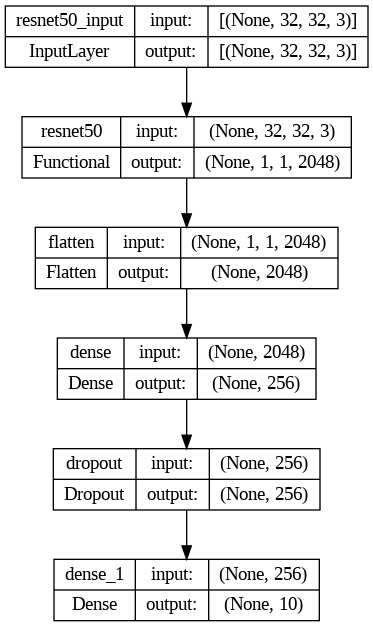

In [6]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Plotting the model and saving to file for presentation
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the model plot inline
Image(filename='model_plot.png')


In [7]:
from keras import callbacks

# Preventing overfitting by training for an optimal number of epochs
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

# Training the model
MyModel = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(x_val, y_val),
                    callbacks = [earlystopping])


Epoch 1/25
625/625 [==============================] - 131s 205ms/step - loss: 2.2789 - accuracy: 0.1314 - val_loss: 2.1590 - val_accuracy: 0.2374
Epoch 2/25
625/625 [==============================] - 144s 231ms/step - loss: 2.1839 - accuracy: 0.1706 - val_loss: 2.1264 - val_accuracy: 0.2317
Epoch 3/25
625/625 [==============================] - 151s 242ms/step - loss: 2.1578 - accuracy: 0.1803 - val_loss: 2.0680 - val_accuracy: 0.2734
Epoch 4/25
625/625 [==============================] - 148s 237ms/step - loss: 2.1419 - accuracy: 0.1866 - val_loss: 2.0220 - val_accuracy: 0.2758
Epoch 5/25
625/625 [==============================] - 142s 227ms/step - loss: 2.1312 - accuracy: 0.1914 - val_loss: 2.0453 - val_accuracy: 0.2700
Epoch 6/25
625/625 [==============================] - 142s 227ms/step - loss: 2.1215 - accuracy: 0.1898 - val_loss: 2.0173 - val_accuracy: 0.2910
Epoch 7/25
625/625 [==============================] - 144s 231ms/step - loss: 2.1174 - accuracy: 0.1908 - val_loss: 2.0067 -

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 27s 87ms/step - loss: 1.9307 - accuracy: 0.3478
Test accuracy: 0.34779998660087585


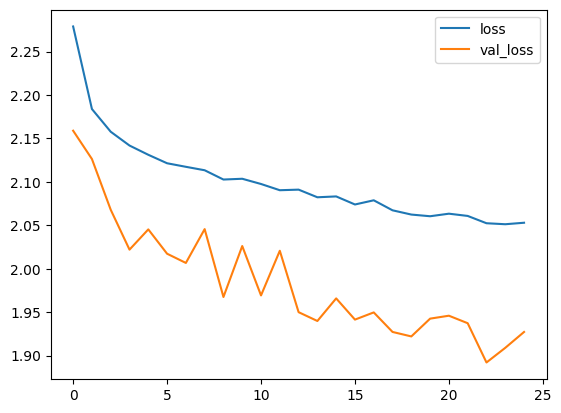

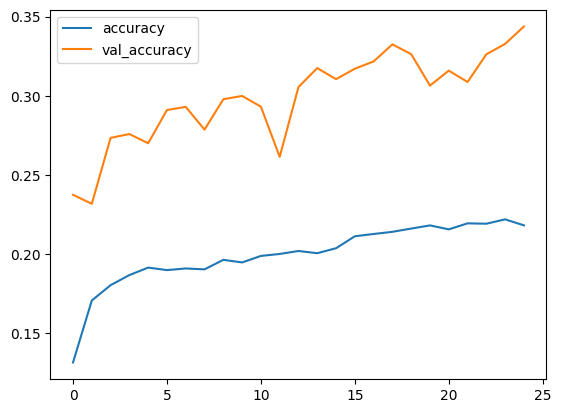

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy with each epoch
MyModel_df = pd.DataFrame(MyModel.history)
MyModel_df.loc[:, ['loss', 'val_loss']].plot()
MyModel_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
